## **Analyzing Historical Stock/Revenue Data and Building a Dashboard**

### Author
Anushka Vashisht

### Role

As a data scientist working for an investment firm, you will extract the revenue data for Tesla and GameStop and build a dashboard to compare the price of the stock vs the revenue. 

### Agenda

* Question 1 - Extracting Tesla Stock Data Using yfinance 
* Question 2 - Extracting Tesla Revenue Data Using Webscraping 
* Question 3 - Extracting GameStop Stock Data Using yfinance 
* Question 4 - Extracting GameStop Revenue Data Using Webscraping 
* Question 5 - Tesla Stock and Revenue Dashboard 
* Question 6 - GameStop Stock and Revenue Dashboard
* Question 7 - Sharing your Assignment Notebook

### Installing and Importing

In [1]:
3#yfinance offers simple access to the Yahoo Finance API. It enables users to download historical stock data, in this case extracting Tesla Stock Data. 
!pip install yfinance
#Beautiful Soup (bs4) is a Python web scraping toolkit that extracts information from web pages, documents, HTML, and XML files.
!pip install bs4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=54edbb381bf462ed3f22b7d799c65c4b613fd42d07892b91a2e0e5a3e4d85297
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/77/8a/04/7b1a8ce5de6555a18e09370d3d4fde48be9571ac07a623071e
Successfully built bs4


In [2]:
#Importing yfinance under the yf alias.
import yfinance as yf

#Importing BeautifulSoup from bs4 to parse a web page's source code and filter it to identify what's needed.
from bs4 import BeautifulSoup

#Pandas is usually imported under the pd alias.
import pandas as pd

#The requests module allows you to send HTTP requests using Python.
import requests

#Figures with subplots are created using the make_subplots function from the plotly.subplots
from plotly.subplots import make_subplots

#The plotly. graph_objects module (which is usually imported as go) comprises an automatically built hierarchy of Python classes that symbolize non-leaf nodes in this figure structure. 
import plotly.graph_objects as go

In [36]:
#Defining the graphing function for future use.
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, 
                        cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .4)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), 
                             y=stock_data.Close.astype("float"), name="Share Price"), 
                  row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), 
                             y=revenue_data.Revenue.astype("float"), name="Revenue"), 
                  row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    
    fig.update_xaxes(title_text="Date", row=2, col=1)
    
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
    
                      height=900,
    
                      title=stock,
    
                      xaxis_rangeslider_visible=True)
    
    fig.show()

### Question 1 - Extracting Tesla Stock Data Using yfinance

In [7]:
#Creating a Ticker object to extract stock data by using "TSLA", the ticker symbol for Tesla. 
Tesla_Stock = yf.Ticker('TSLA')

#The history function is to extract stock data and save it to the dataframe "tesla_data".
tesla_data = Tesla_Stock.history(period = "max") 

#Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [47]:
#Downloading the webpage below through usage of the requests library
data_link = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

#The text is saved as a variable named "link_data"
link_data = requests.get(data_link).text

#Parsing the html link data
beautiful_soup = BeautifulSoup(link_data, "html.parser")

#Returning the all the element of given tag with the find_all function
beautiful_soup.find_all('title')

#Extracting data in a table with Tesla revenue and storing it in a dataframe called "tesla_revenue"
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

#Addings structure to the table with Date and Revenue columns
for row in beautiful_soup.find_all("tbody")[1].find_all("tr"):
    
    col = row.find_all("td") 
    
    #Date column
    date = col[0].text 
    
    #Revenue column
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    #Dataframe
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue},
                                         ignore_index = True)

#There are some empty blanks so the following code removes empty rows and shows the last 5 rows in the data that display Tesla revenue
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""] 

#Displaying the last five rows of the tesla_revenue dataframe using the tail function.
tesla_revenue.tail()

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


### Question 3 - Extracting GameStop Stock Data Using yfinance

In [24]:
##Creating a Ticker object to extract stock data by using "GME", the ticker symbol for GameStop. 
GameStop_Stock = yf.Ticker("GME")

#The history function is to extract stock data and save it to the dataframe "gme_data".
gme_data = GameStop_Stock.history(period = 'max')

##Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [27]:
#Downloading the webpage below through usage of the requests library
data_link = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

#The text is saved as a variable named "link_data"
link_data = requests.get(data_link).text

#Parsing the html link data
beautiful_soup = BeautifulSoup(link_data, "html.parser")

#Returning the all the element of given tag with the find_all function
beautiful_soup.find_all('title')

#Extracting data in a table with GameStop revenue and storing it in a dataframe called "gme_revenue"
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

#Addings structure to the table with Date and Revenue columns
for row in beautiful_soup.find_all("tbody")[1].find_all("tr"):
    
    col = row.find_all("td") 
    
    #Date column
    date = col[0].text 
    
    #Revenue column
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    #Dataframe
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, 
                                     ignore_index = True)

#Displaying the last five rows of the gme_revenue dataframe using the tail function.
gme_revenue.tail()

,Date,Revenue
52,2010-01-31,3524
53,2009-10-31,1835
54,2009-07-31,1739
55,2009-04-30,1981
56,2009-01-31,3492


### Question 5 - Tesla Stock and Revenue Dashboard

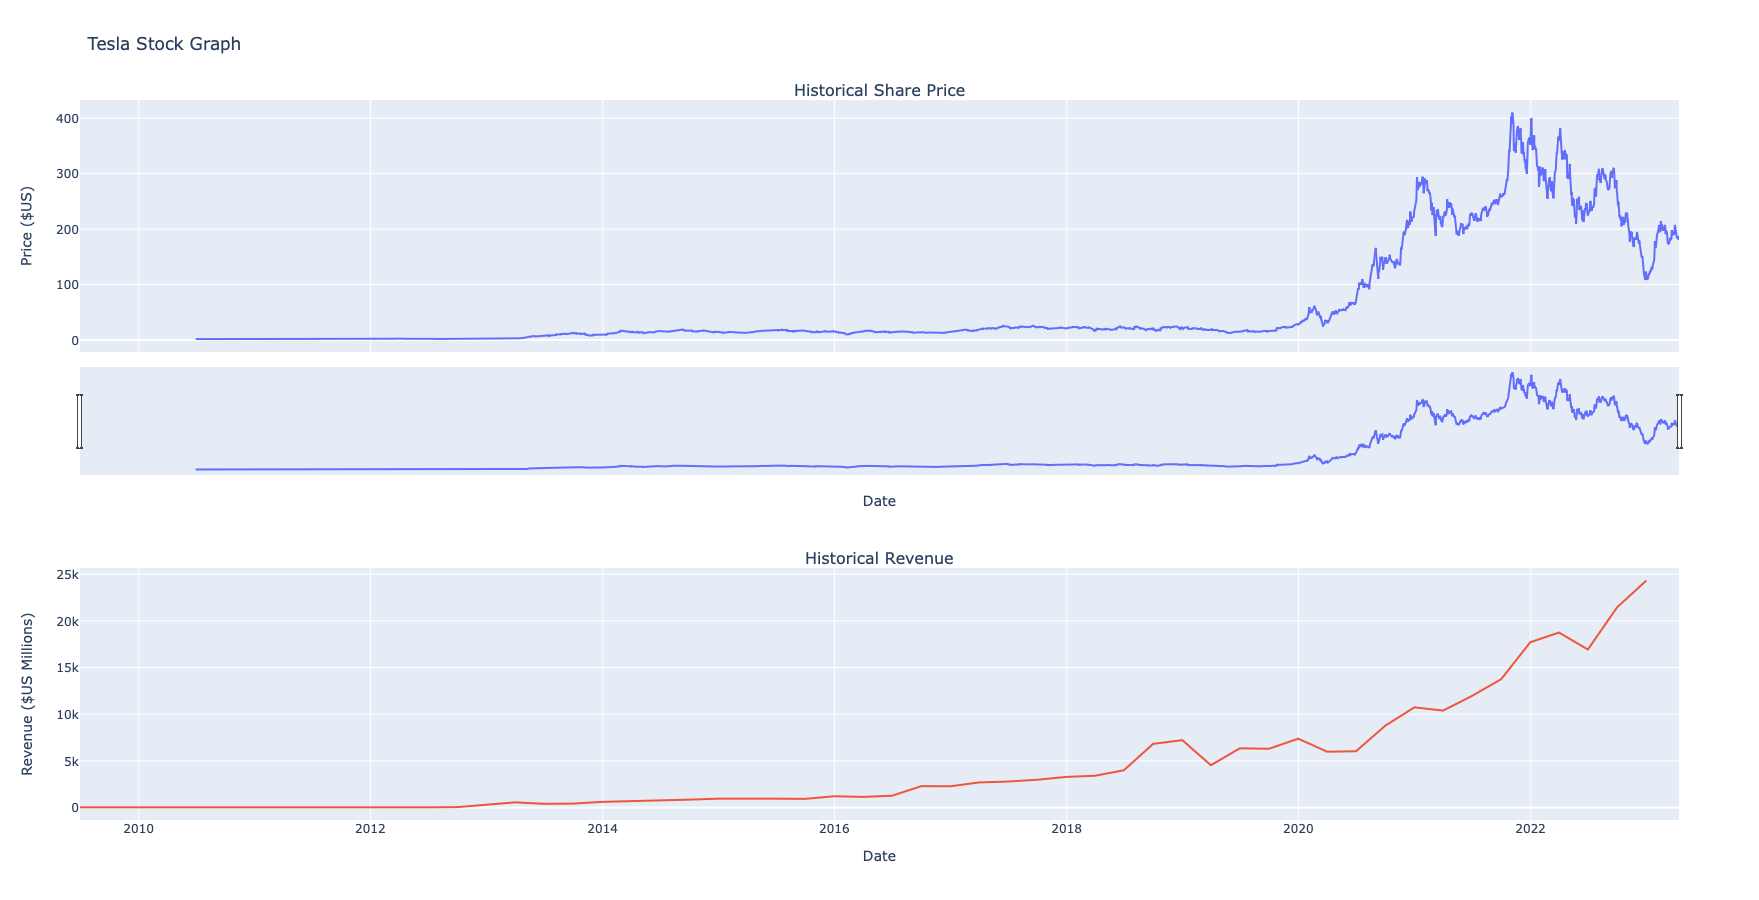

In [50]:
#Using the make_graph function to graph the Tesla Stock Data, also providing a title for the graph
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Graph')

### Question 6 - GameStop Stock and Revenue Dashboard

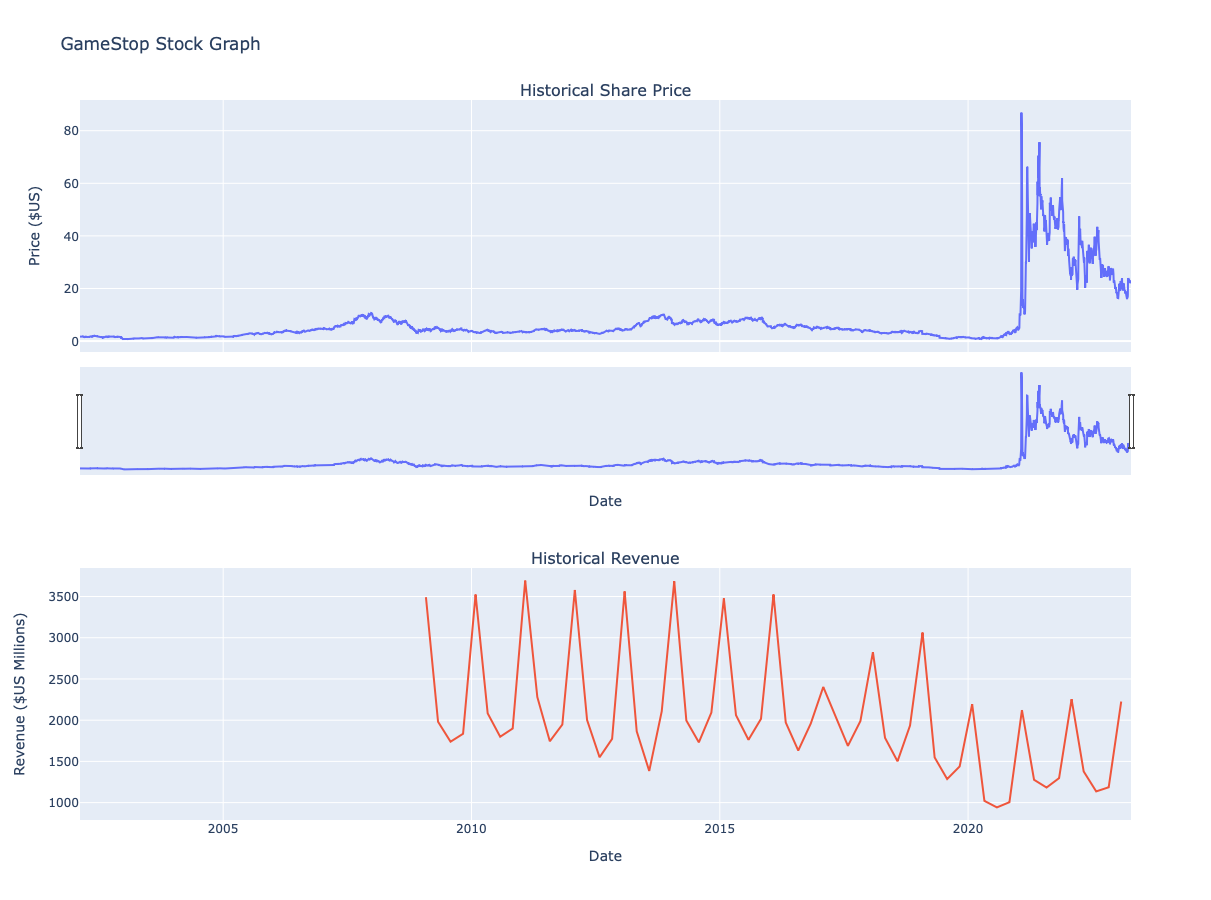

In [52]:
#Using the make_graph function to graph the GameStop Stock Data, also providing a title for the graph.
make_graph(gme_data, gme_revenue, 'GameStop Stock Graph')